# Data Science Project Proposal

## Introduction

This data frame contains data for heart diseases of 303 patients from Cleveland. There are13 attributes recorded for every patient that may or may not be linked to the type of heart disease they have. The 13 attributes contain: Age, Sex, Chest pains, Resting blood pressure

We plan to predict the heart disease diagnosis of a new patient based on information about them. The information on which we will base our analysis includes the patient’s age, their type of chest pain, the patient’s resting blood pressure, their cholesterol, their resting electrocardiographic results, maximum heart rate achieved, and whether or not they experience exercise induced angina. Our prediction will determine to what degree the patient has heart disease, from 0 (no heart disease) to 4. 

This data frame uses common variables that lead to heart diseases to predict a diagnosis. For example, a higher cholestorol can lead to heart attacks or other severe heart disorders. Thus, the data frame uses this variable and many others in its prognosis.



## Column Names and Meanings:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status) (0: < 50% diameter narrowing, 1: > 50% diameter narrowing)(in any major vessel: attributes 59 through 68 are vessels)

In [1]:
library(tidyverse)
library(repr)
library(stringr)
library(testthat)
library(digest)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

In [2]:
cleveland_heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=c("age", "sex", "cp", 
                                                                                             "trestbps", "chol", "fbs", 
                                                                                             "restecg", "thalach", "exang", 
                                                                                             "oldpeak", "slope", "ca", "thal", 
                                                                                             "num"))
cleveland_heart_disease


Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## Column Descriptions for Relevant Columns:
* age: age in years
* cp: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* num: diagnosis of heart disease (angiographic disease status) (0: < 50% diameter narrowing, 1: > 50% diameter narrowing)(in any major vessel: attributes 59 through 68 are vessels)

In [13]:
cleveland_select <- cleveland_heart_disease %>%
    select(-sex, -fbs, -slope, -ca, -oldpeak, -thal, -cp, -restecg, -exang)%>%
    mutate(num = as_factor(num))
cleveland_select

age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


In [14]:
set.seed(3546)

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

cleveland_training


age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


In [15]:
cleveland_summarized <- cleveland_training %>%
group_by(num) %>%
summarize(count=n())

cleveland_mean_predictors <- cleveland_training %>%
select(-num)%>%
map_df(mean)

cleveland_summarized
cleveland_mean_predictors

`summarise()` ungrouping output (override with `.groups` argument)



num,count
<fct>,<int>
0,124
1,42
2,27
3,27
4,10


age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
54.49565,131.8609,247.3522,148.1478


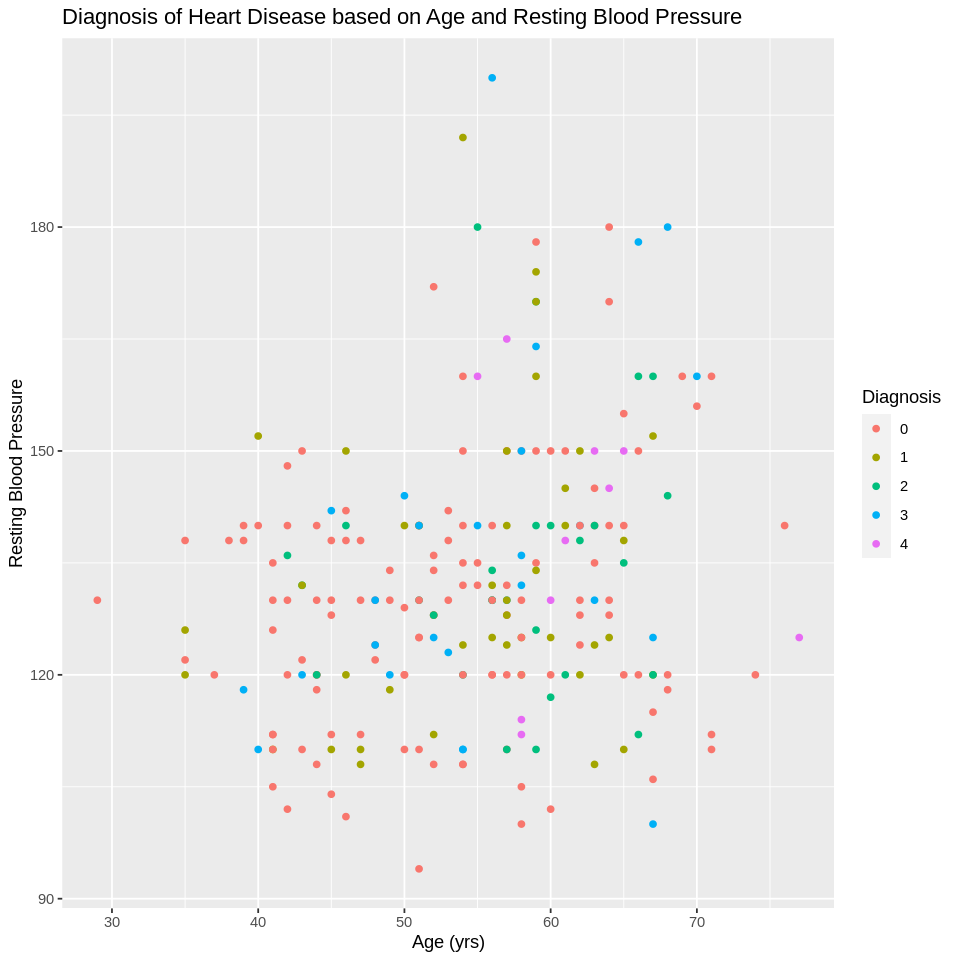

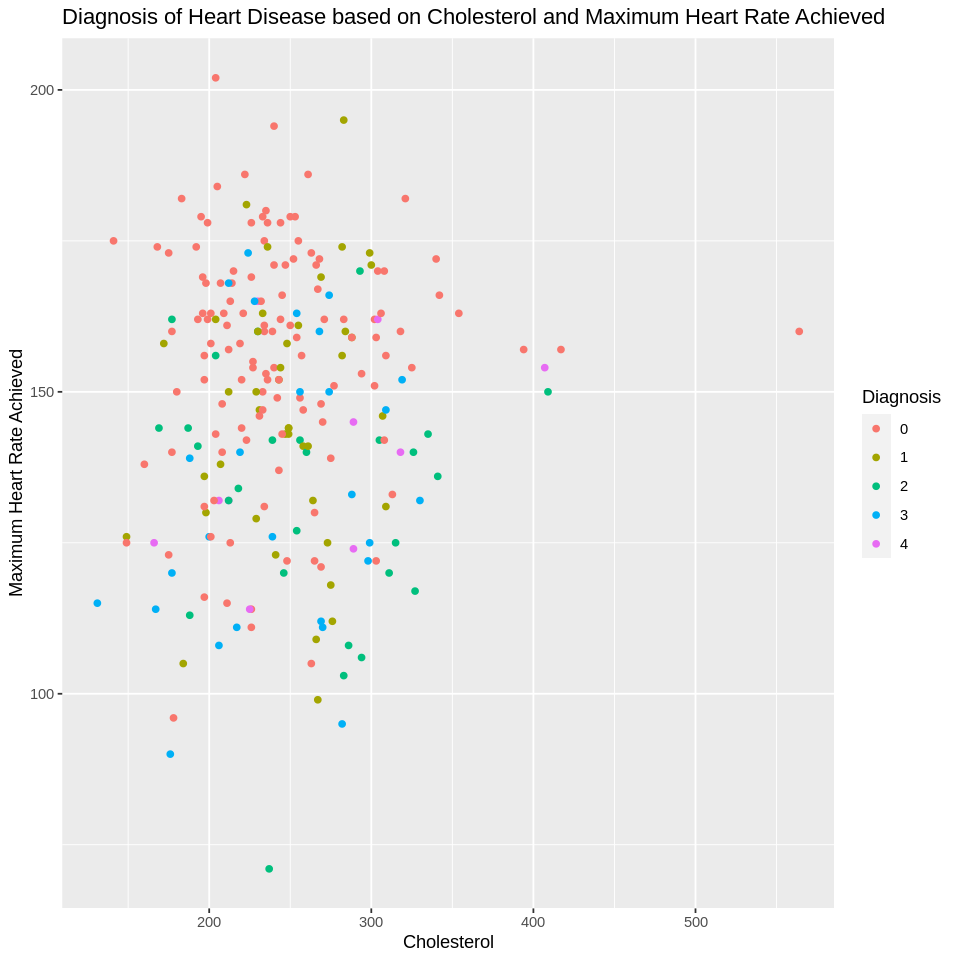

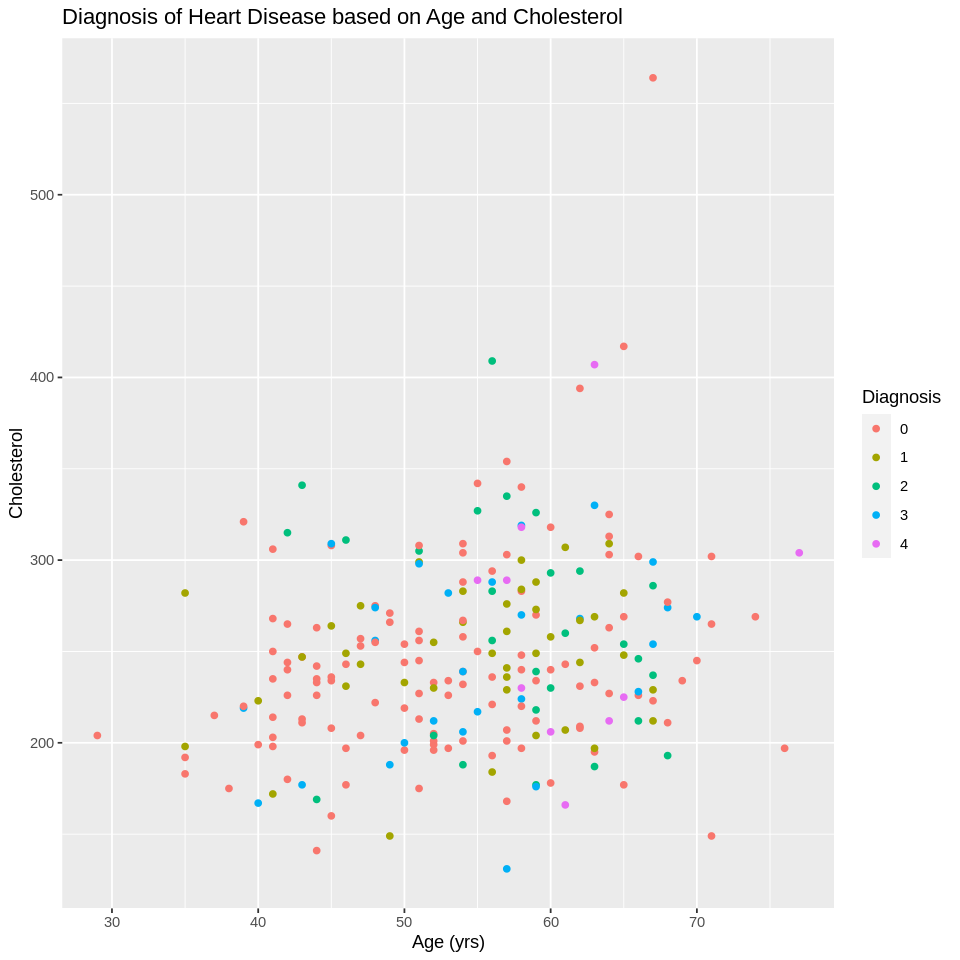

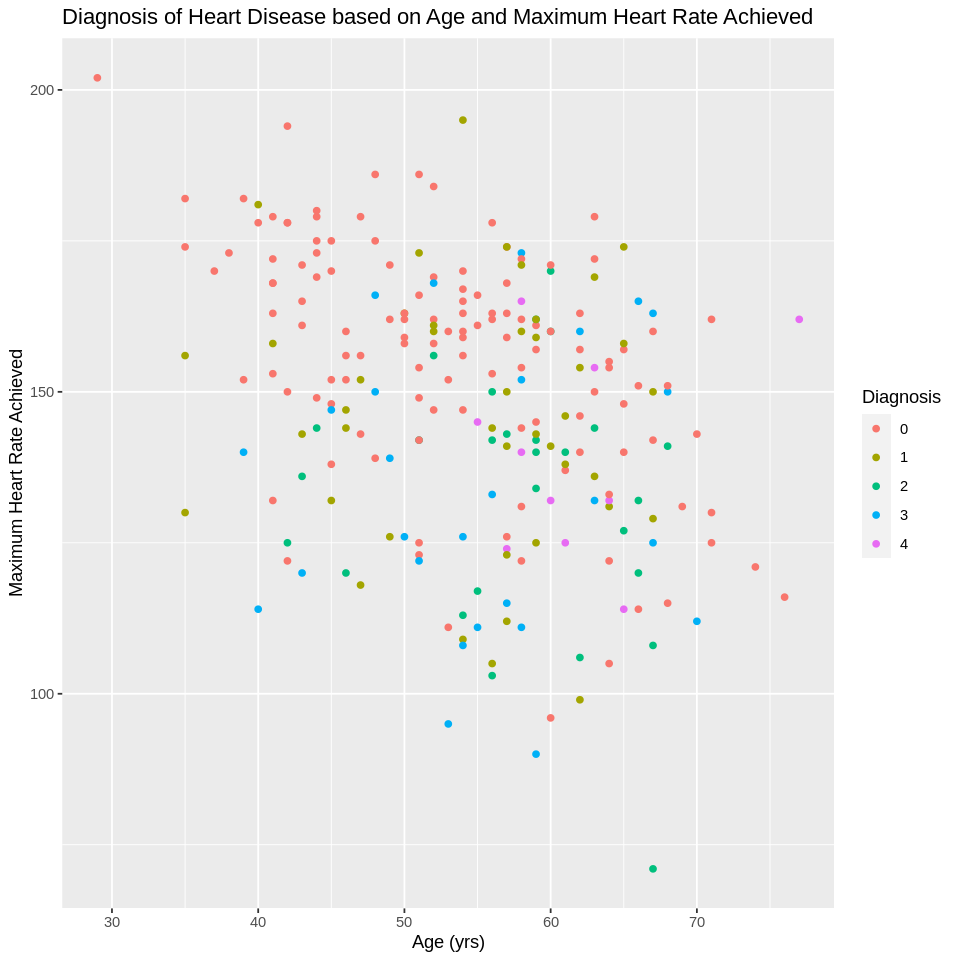

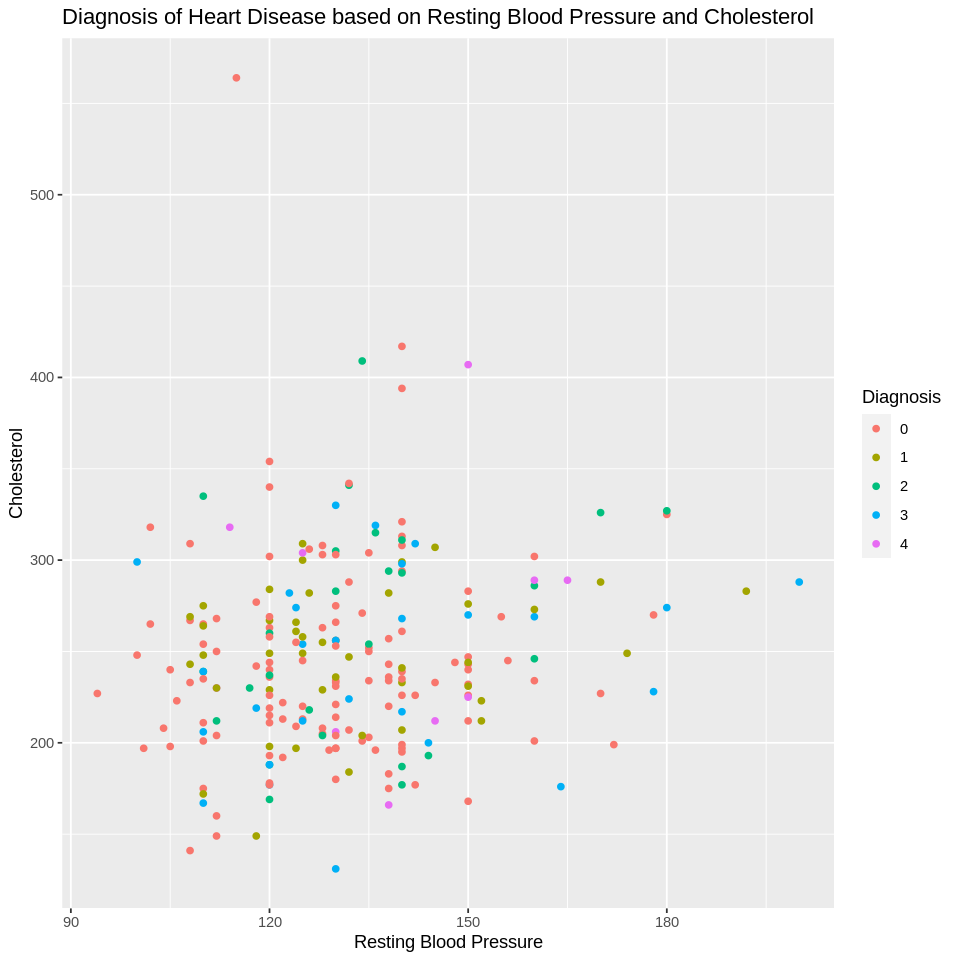

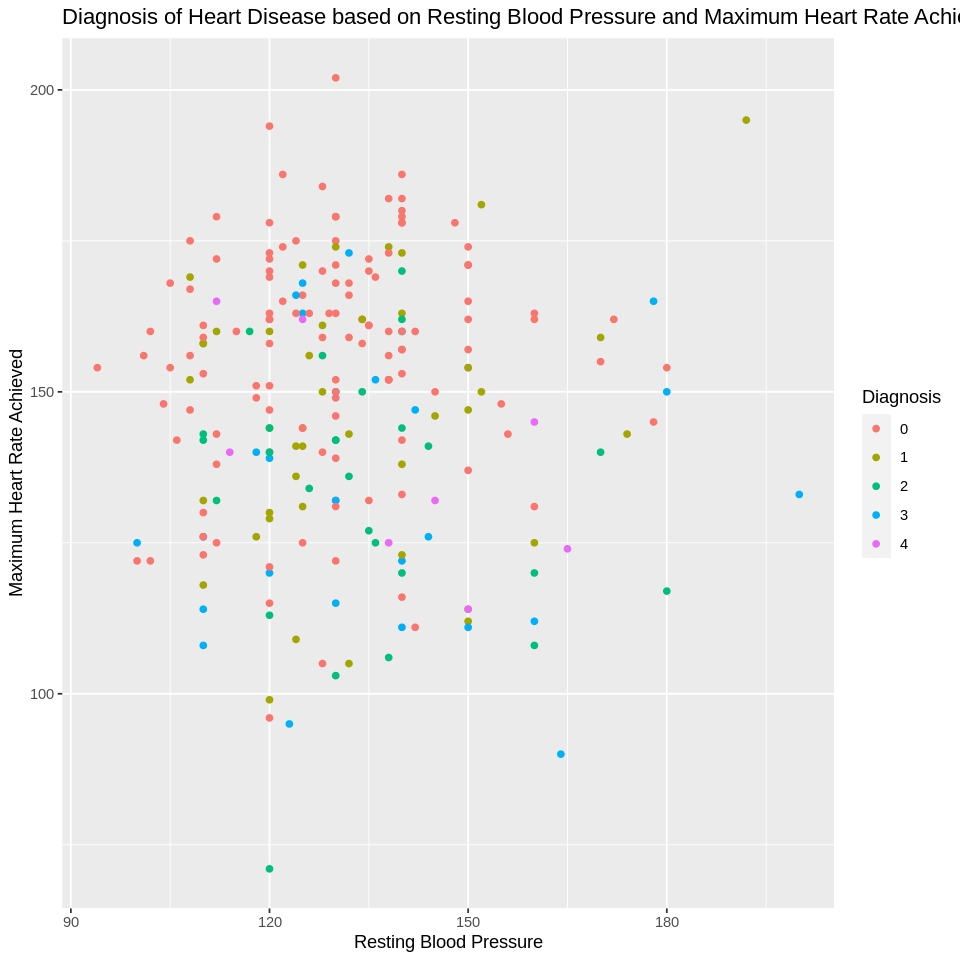

In [23]:
options(repr.plot.width = 8, repr.plot.height = 8)

cleveland_plot_1 <- cleveland_training %>%
ggplot(aes(x=age, y=trestbps, colour=num)) +
geom_point()+
labs(x="Age (yrs)", y="Resting Blood Pressure", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Resting Blood Pressure")

cleveland_plot_1

cleveland_plot_2 <- cleveland_training %>%
ggplot(aes(x=chol, y=thalach, colour=num)) +
geom_point()+
labs(x="Cholesterol", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Cholesterol and Maximum Heart Rate Achieved")

cleveland_plot_2

cleveland_plot_3 <- cleveland_training %>%
ggplot(aes(x=age, y=chol, colour=num)) +
geom_point()+
labs(x="Age (yrs)", y="Cholesterol", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Cholesterol")

cleveland_plot_3

cleveland_plot_4 <- cleveland_training %>%
ggplot(aes(x=age, y=thalach, colour=num)) +
geom_point()+
labs(x="Age (yrs)", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Age and Maximum Heart Rate Achieved")

cleveland_plot_4

cleveland_plot_5 <- cleveland_training %>%
ggplot(aes(x=trestbps, y=chol, colour=num)) +
geom_point()+
labs(x="Resting Blood Pressure", y="Cholesterol", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Cholesterol")

cleveland_plot_5

cleveland_plot_6 <- cleveland_training %>%
ggplot(aes(x=trestbps, y=thalach, colour=num)) +
geom_point()+
labs(x="Resting Blood Pressure", y="Maximum Heart Rate Achieved", colour= "Diagnosis")+
ggtitle("Diagnosis of Heart Disease based on Resting Blood Pressure and Maximum Heart Rate Achieved")

cleveland_plot_6
